<a href="https://colab.research.google.com/github/gustabart/dm/blob/main/competencia_udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

# Lectura de datos

In [ ]:
df_entrenamiento = pd.read_excel('/content/udemy_entrenamiento.xlsx', index_col="id")
df_entrenamiento.head()

In [ ]:
df_prueba = pd.read_excel('/content/udemy_prueba.xlsx', index_col="id")
df_prueba.head()

# Entendimiento (magia parte 1)

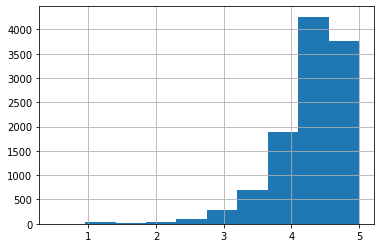

In [ ]:
df_entrenamiento['rating'].hist();

In [ ]:
df_entrenamiento['locale'].value_counts()

es_ES    6575
es_LA    2381
es_MX    1444
es_CO     430
es_VE     156
es_CL     101
Name: locale, dtype: int64

In [ ]:
df_entrenamiento.corr()

,is_practice_test_course,rating,num_published_lectures,num_published_practice_tests
is_practice_test_course,1.000000,-0.067705,-0.101295,0.820798
rating,-0.067705,1.000000,0.102981,-0.042436
num_published_lectures,-0.101295,0.102981,1.000000,-0.071914
num_published_practice_tests,0.820798,-0.042436,-0.071914,1.000000


In [ ]:
df_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11087 entries, 1 to 11087
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         11087 non-null  object 
 1   headline                      11086 non-null  object 
 2   is_practice_test_course       11087 non-null  bool   
 3   bestseller                    11087 non-null  object 
 4   captions                      9142 non-null   object 
 5   rating                        11087 non-null  float64
 6   num_published_lectures        11087 non-null  int64  
 7   num_published_practice_tests  11087 non-null  int64  
 8   locale                        11087 non-null  object 
 9   created_date                  11087 non-null  object 
 10  instructional_level_simple    11082 non-null  object 
 11  published_date                11087 non-null  object 
 12  last_update_date              9805 non-null   object 
 13  c

# Limpieza (magia parte 2)

In [ ]:
columnas = ['is_practice_test_course', 'rating', 'num_published_lectures', 'num_published_practice_tests', 'bestseller']
df_entrenamiento = df_entrenamiento[columnas]
df_prueba = df_prueba[columnas]

# Territorio de Aprendizaje Automático
Se mira y no se toca

In [ ]:
# Datos para probar
X = df_entrenamiento[df_entrenamiento.columns.drop('bestseller')]
y = df_entrenamiento['bestseller']

# Partimos en entrenamiento y prueba 
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Creamos el objeto del modelo
clf = sk.ensemble.RandomForestClassifier(n_estimators=3000, criterion='gini', max_depth=5, n_jobs=-1, random_state=42)

# Entrenamos el modelo
clf.fit(X_train, y_train)

# Predecimos
y_pred = clf.predict(X_test)

# Medimos la performance de la predicción
sk.metrics.accuracy_score(y_test, y_pred)

0.8124436429215509

In [ ]:
# Datos a predecir 
X_prueba = df_prueba[df_prueba.columns.drop('bestseller')]

# Entrenamos el modelo con todos los datos
clf.fit(X, y)

# Predecimos
df_prueba['bestseller'] = clf.predict(X_prueba)

# Grabamos
df_prueba['bestseller'].to_csv('/content/solucion.csv')